# 4-order simplectic integrator (Yoshida)

La ecuación diferencial de un oscilador armónico está dada por:  
$\frac{d^{2}x}{dt^{2}} + x = 0$  
donde la masa y la constante del resorte son iguales a uno. Las condiciones iniciales del problema
son:  
$x(0) = 1$  
$\dot{x} = 0$

$U = \begin{equation}
\begin{pmatrix}
x\\
\dot{x}
\end{pmatrix}
\end{equation}$

Tomemos la derivada de este vector y usemos la ecuacion diferencial:  
$\frac{dU}{dt}= \begin{equation}
\begin{pmatrix}
\dot{x}\\
-x
\end{pmatrix}
\end{equation}$ $ =  \begin{equation}
\begin{pmatrix}
0 & 1\\
-1 & 0
\end{pmatrix}
\end{equation}$ $ \begin{equation}
\begin{pmatrix}
x\\
\dot{x}
\end{pmatrix}
\end{equation}$ $ = JU = F(U)$

### Método Leap-Frog Orden 2

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [130]:
N = 501
t = np.linspace(0.,10.,N)

In [131]:
def leapfrog2(r0,t):
    
    J = np.array([[0,1],[-1,0]])
    
    def F(U):
        return np.dot(J,U)
    
    h = (t[-1]-t[0])/(len(t)-1)
    U = np.zeros((len(t),2))
    
    # Condicion inicial
    U[0] = r0
    
    for i in range(1,len(t)):
        if i == 1:
            U[i] = U[i-1] + h*F(U[i-1])
        else:
            U[i] = U[i-2] + 2*h*F(U[i-1])
    
    E = np.zeros((len(t),2))
    E[:,0] = 0.5*U[:,1]**2 
    E[:,1] = 0.5*U[:,0]**2
    
    return E

In [132]:
r0 = np.array([1.0,0])
E = leapfrog2(r0,t)

### Método Leap-Frog Orden 4

In [133]:
def leapfrog4(r0,t):
    V = np.zeros(len(t))
    X = np.zeros(len(t))
    
    K = np.zeros(len(t))
    U = np.zeros(len(t))
    
    h = (t[-1]-t[0])/(len(t)-1)
    # Condicion inicial
    K[0] = 0.5 
    U[0] = 0
    X[0] = r0[0]
    V[0] = r0[1]
    
    # Coeficientes
    c1,c2,c3,c4 = 0.6756, -0.1756, -0.1756, 0.6756
    d1,d2,d3 = 1.3512, -1.7024 ,1.3512
    
    for i in range(0,len(t)-1):
        
        x1 = X[i] + c1*h*V[i]
        v1 = V[i] + d1*h*(-x1)
        x2 = x1 + c2*h*v1
        v2 = v1 + d2*h*(-x2)
        x3 = x2 + c3*h*v2
        v3 = v2 + d3*h*(-x3)
        
        X[i+1] = x3 + c4*h*v3 
        V[i+1] = v3
        
        K[i+1] = 0.5*v3**2
        U[i+1] = 0.5*X[i+1]**2
    
    return K,U

In [134]:
r0 = np.array([1.0,0])
K,U = leapfrog4(r0,t)
E2 = K+U
E1 =E[:,0]+E[:,1]

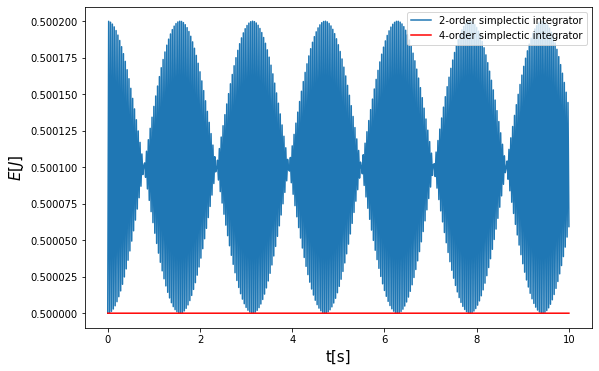

In [135]:
# Gráfica

fig = plt.figure(figsize=(20,13))
ax = fig.add_subplot(221)

ax.plot(t,E1,label='2-order simplectic integrator')
ax.plot(t,E2,label='4-order simplectic integrator', color="r")
ax.set_xlabel(r't[s]',fontsize=15)
ax.set_ylabel(r'$E[J]$',fontsize=15)
ax.legend(loc=1)

### Comentario:
No sabemos por qué la energía total del oscilador con el método de orden 2 nos da sobre la energía total del método de orden 4, además de que la primera energía total obtenida nos da un espectro diferente al esperado (planteado en el taller) en donde se aprecia una sola línea.